<a href="https://colab.research.google.com/github/Adrok24/classification-of-plant-diseases/blob/main/Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from zipfile import ZipFile 
import os

In [4]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')

Mounted at /content/drive


In [5]:
import zipfile
folder = 'drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'

In [6]:
plants_files_folder = "Plant_leave_diseases_dataset_without_augmentation"
with zipfile.ZipFile(folder,"r") as zip_ref:
    zip_ref.extractall("Plants")

In [7]:
base_dir = './Plants'

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [8]:
plants_categories = os.listdir('/'.join((base_dir,plants_files_folder)))

# Creamos los directorios para las 39 clases presentes en el dataset
for directory in (train_dir, validation_dir, test_dir):
    for folder_name in plants_categories:
        name_split = folder_name.split('___') 
        plant_name = name_split[0]
        path_dir = ""
        if (len(name_split) > 1):
            plant_health = name_split[1]
            path_dir = os.path.join(directory, plant_health, plant_name)
        else:
            path_dir = os.path.join(directory, plant_name)
        os.makedirs(path_dir, exist_ok=True)

In [9]:
        class_directory = os.path.join(directory, folder_name)
        os.makedirs(class_directory, exist_ok=True)
        

In [10]:
import shutil

for plant_category in plants_categories:
    plants_pictures = os.listdir('/'.join((base_dir,plants_files_folder, plant_category)))


    name_split = plant_category.split('___') 
    plant_name = name_split[0]
    path_dir = ""
    if (len(name_split) > 1):
        plant_health = name_split[1]
        path_dir = os.path.join( plant_health, plant_name)
    else:
        path_dir = os.path.join(plant_name)
    #print(path_dir)
    
    #Dividimos train 80%, validation 10% y test 10%. 
    train_ds = plants_pictures[:int(len(plants_pictures)*0.8)]


    #Copio los porcentajes de cada clase en su correspondiente carpeta
    fnames = ['image ({}).JPG'.format(i) for i in range(1,len(train_ds))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'train',path_dir, fname)
            shutil.copyfile(src, dst)
        except OSError:
            pass

    
    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.8), int(len(plants_pictures)*0.9))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'validation',path_dir, fname)
            shutil.copyfile(src, dst)      
        except:
            pass


    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.9), len(plants_pictures))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'test',path_dir, fname)
            shutil.copyfile(src, dst)
                
        except OSError:
            pass
        

In [11]:
import pandas as pd
dict_train = {}
count_files = 0

for root, dirs, files in os.walk(train_dir, topdown=False):
    for name_file in files:
        dict_train[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4]}
        count_files = count_files + 1

df_train = pd.DataFrame.from_dict(dict_train, "index")
display(df_train.shape)

dict_test = {}
count_files = 0

for root, dirs, files in os.walk(test_dir, topdown=False):
    for name_file in files:
        dict_test[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4]}
        count_files = count_files + 1

df_test = pd.DataFrame.from_dict(dict_test, "index")
display(df_test.shape)

dict_validation = {}
count_files = 0

for root, dirs, files in os.walk(validation_dir, topdown=False):
    for name_file in files:
        dict_validation[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4]}
        count_files = count_files + 1

df_validation = pd.DataFrame.from_dict(dict_validation, "index")
display(df_validation.shape)

(42208, 4)

(5288, 4)

(5272, 4)

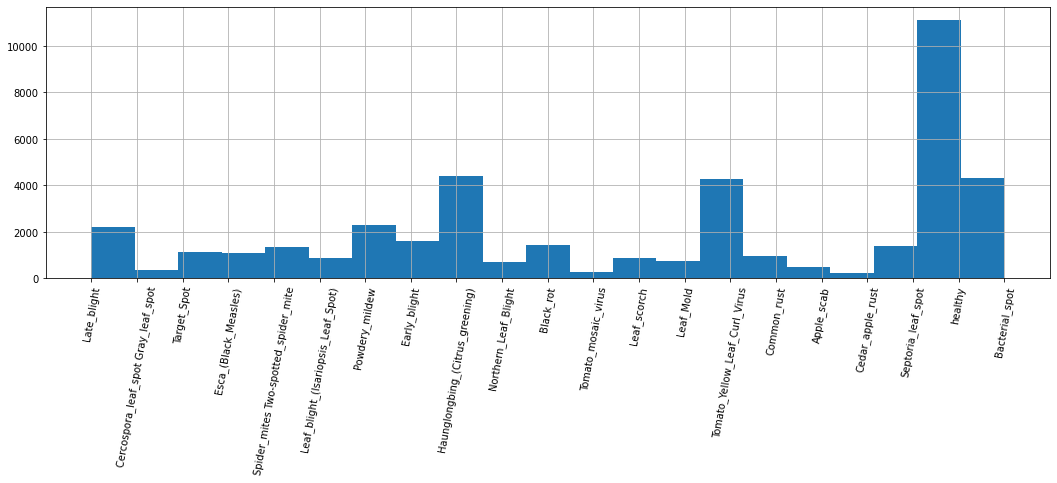

In [13]:
df_train.health.hist(figsize=(18,5), xrot=80, bins=df_train.health.value_counts().shape[0])

In [14]:
df_train.health.value_counts()

healthy                                 11137
Haunglongbing_(Citrus_greening)          4404
Bacterial_spot                           4332
Tomato_Yellow_Leaf_Curl_Virus            4284
Powdery_mildew                           2289
Late_blight                              2204
Early_blight                             1598
Black_rot                                1438
Septoria_leaf_spot                       1415
Spider_mites Two-spotted_spider_mite     1339
Target_Spot                              1122
Esca_(Black_Measles)                     1105
Common_rust                               952
Leaf_scorch                               886
Leaf_blight_(Isariopsis_Leaf_Spot)        859
Leaf_Mold                                 760
Northern_Leaf_Blight                      707
Apple_scab                                503
Cercospora_leaf_spot Gray_leaf_spot       358
Tomato_mosaic_virus                       297
Cedar_apple_rust                          219
Name: health, dtype: int64

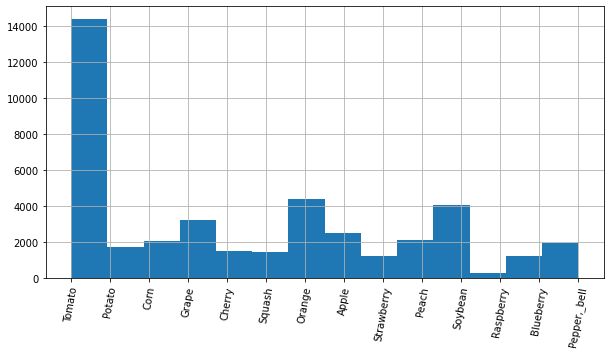

In [15]:
df_train.type.hist(figsize=(10,5), xrot=80, bins=df_train.type.value_counts().shape[0])

In [16]:
df_train.type.value_counts()

Tomato          14391
Orange           4404
Soybean          4071
Grape            3244
Apple            2532
Peach            2123
Corn             2034
Pepper,_bell     1976
Potato           1718
Cherry           1522
Squash           1449
Strawberry       1249
Blueberry        1200
Raspberry         295
Name: type, dtype: int64

In [22]:
df = pd.concat([df_train, df_validation, df_test],ignore_index=False)

,file,path,health,type
0,./Plants/train/Late_blight/Tomato/image (1253)...,./Plants/train/Late_blight/Tomato,Late_blight,Tomato
1,./Plants/train/Late_blight/Tomato/image (1403)...,./Plants/train/Late_blight/Tomato,Late_blight,Tomato
2,./Plants/train/Late_blight/Tomato/image (1172)...,./Plants/train/Late_blight/Tomato,Late_blight,Tomato
3,./Plants/train/Late_blight/Tomato/image (84).JPG,./Plants/train/Late_blight/Tomato,Late_blight,Tomato
4,./Plants/train/Late_blight/Tomato/image (1374)...,./Plants/train/Late_blight/Tomato,Late_blight,Tomato
...,...,...,...,...
5283,"./Plants/test/Bacterial_spot/Pepper,_bell/imag...","./Plants/test/Bacterial_spot/Pepper,_bell",Bacterial_spot,"Pepper,_bell"
5284,"./Plants/test/Bacterial_spot/Pepper,_bell/imag...","./Plants/test/Bacterial_spot/Pepper,_bell",Bacterial_spot,"Pepper,_bell"
5285,"./Plants/test/Bacterial_spot/Pepper,_bell/imag...","./Plants/test/Bacterial_spot/Pepper,_bell",Bacterial_spot,"Pepper,_bell"
5286,"./Plants/test/Bacterial_spot/Pepper,_bell/imag...","./Plants/test/Bacterial_spot/Pepper,_bell",Bacterial_spot,"Pepper,_bell"


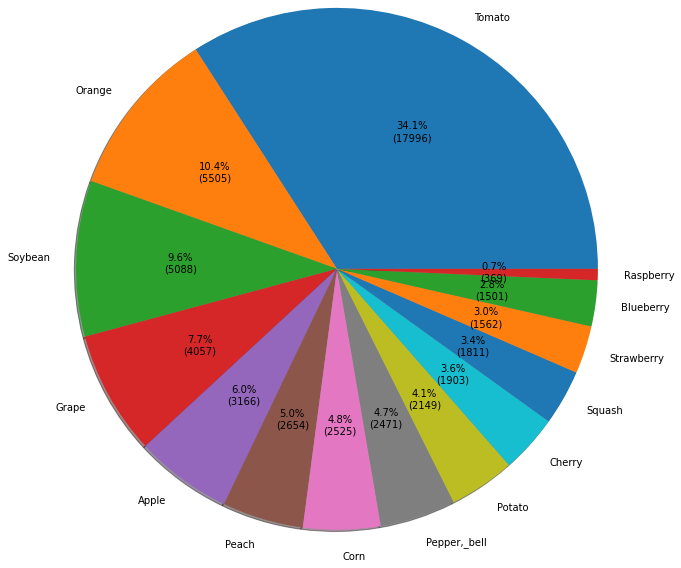

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show, bar
import numpy as np

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


counts_type = df.type.value_counts()

axis('equal');
pie(counts_type, labels=counts_type.index, shadow=True, autopct=lambda pct: func(pct, counts_type), radius=3);
show()


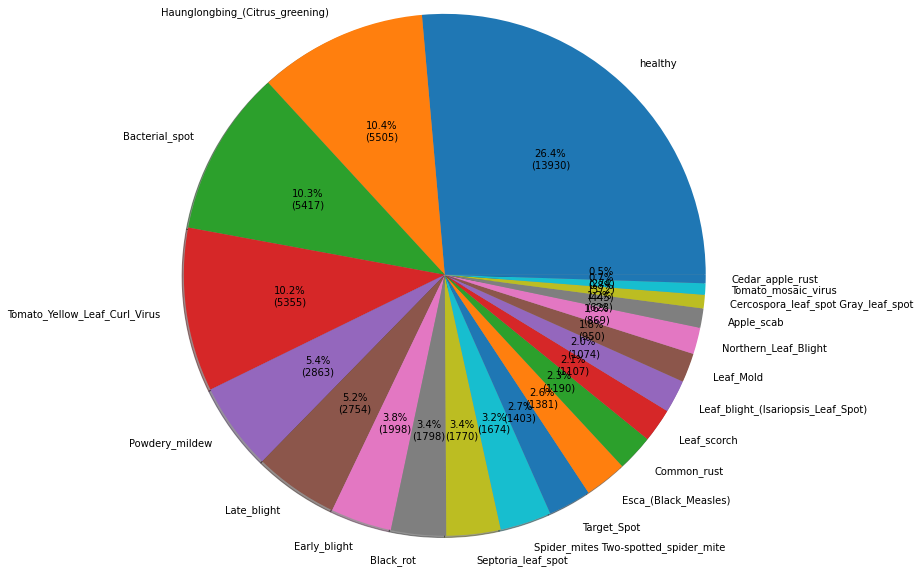

In [59]:
counts_health = df.health.value_counts()

pie(counts_health, labels=counts_health.index, shadow=True, autopct=lambda pct: func(pct, counts_health), radius=3);
show()

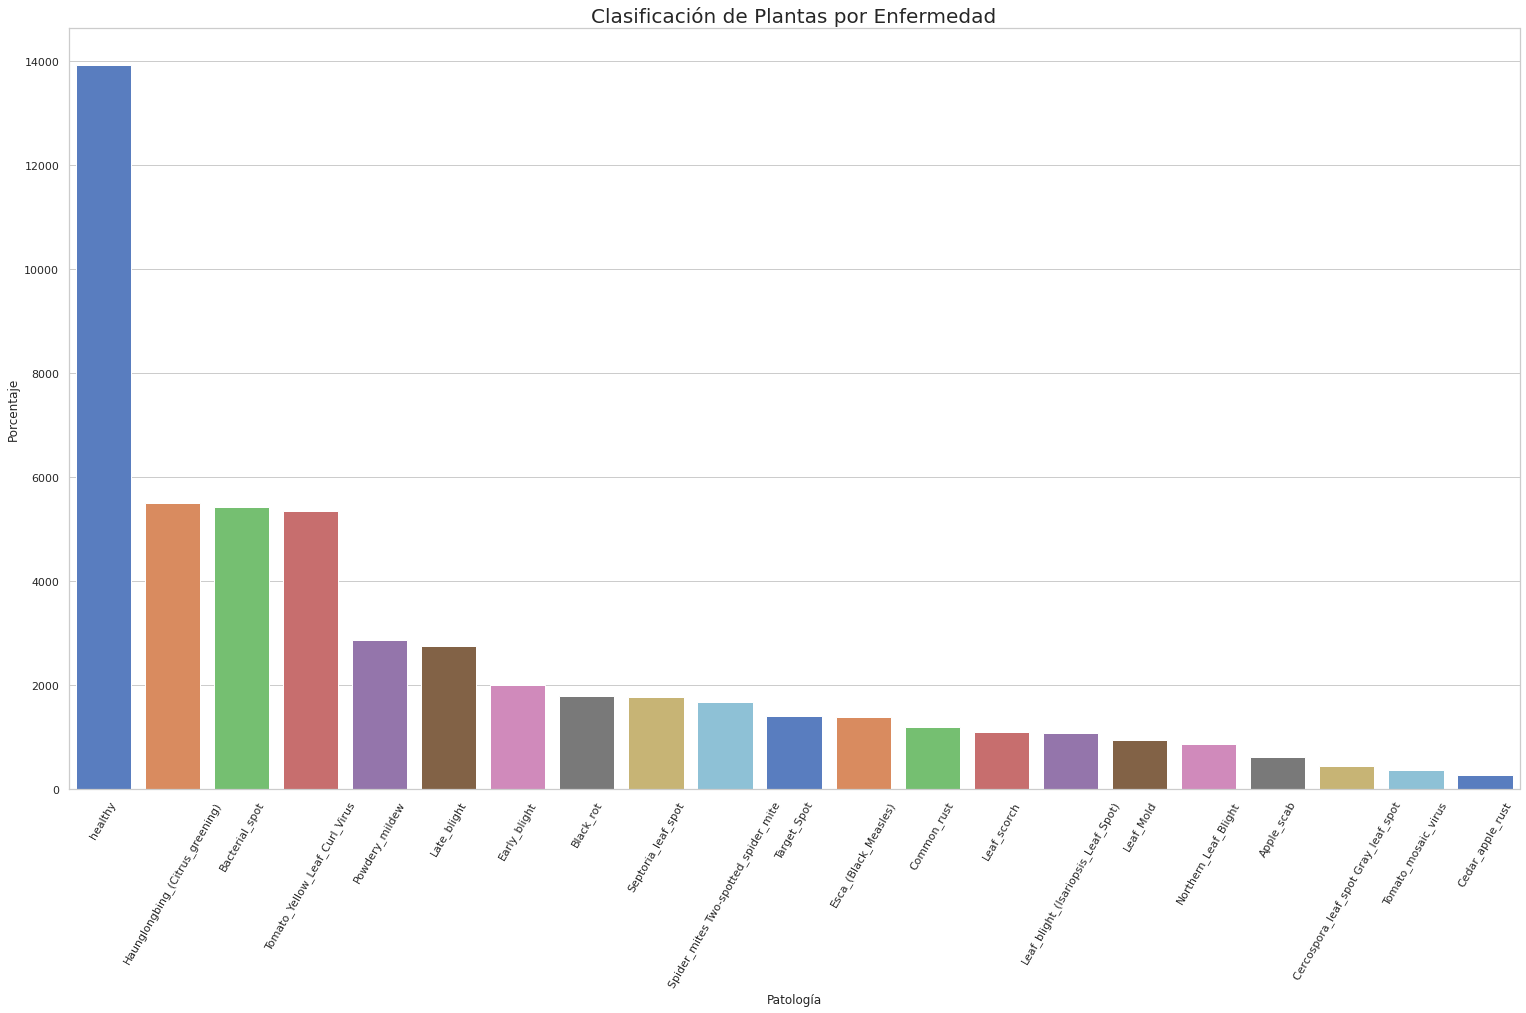

In [86]:
sns.set_style('whitegrid')
bar,ax = plt.subplots(figsize=(26,14))
ax = sns.barplot(x=counts_health.index, y=counts_health, ci=None, palette="muted",orient='v', )
ax.set_title("Clasificación de Plantas por Enfermedad", fontsize=20)

ax.set_xlabel ("Patología")
ax.set_ylabel ( "Porcentaje")
ax.set_xticklabels(rotation=60, labels=counts_health.index)
# calculate the percentages
#for rect in ax.patches:
#    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("bar_chart_health.png");

./Plants/train/healthy/Blueberry/image (1139).JPG


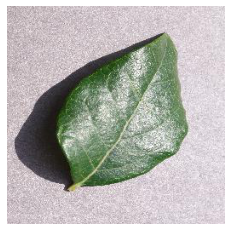

./Plants/train/Leaf_blight_(Isariopsis_Leaf_Spot)/Grape/image (53).JPG


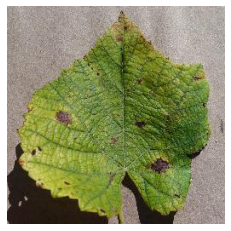

./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/Tomato/image (801).JPG


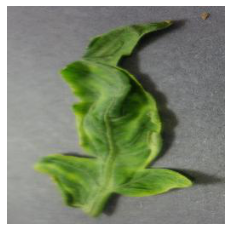

./Plants/train/Target_Spot/Tomato/image (656).JPG


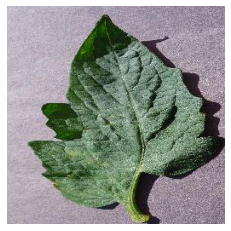

./Plants/train/healthy/Soybean/image (965).JPG


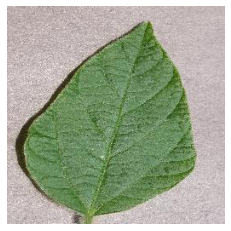

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

for index in np.random.choice(df_train.shape[0], 5):
  plant = df_train.iloc[index].file
  print(plant)
  plt.imshow(image.load_img(plant))
  plt.axis('off')
  plt.show()  